In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
# import modules to work with data formats
from scipy.misc import imread
from scipy.misc import imresize
from scipy.io import savemat
from scipy.io import loadmat
import imageio
import pandas as pd

In [3]:
# import pytorch modules
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [73]:
category_data = pd.read_csv('category.csv', dtype={'id':str, 'synsetId': int, 'subSynsetId':int})
category_code = 3624134#pls fill
subcategory_code_list = [3624134, 3158885, 2812949]#pls fill
# knife_code 3624134
# subnife [3624134, 3158885, 2812949]
# chair_code = 3001627
# subchair_code = 4331277 

In [74]:
temp = category_data[category_data['synsetId'] == category_code]
object_list = []
for subcategory_code in subcategory_code_list:
    object_list += list(temp[temp['subSynsetId'] == subcategory_code].id.values)


In [75]:
len(object_list)

296

In [7]:
# downsample the voxels and images
avgpool3d = nn.AvgPool3d(8, stride=8)
maxpool3d = nn.MaxPool3d(8, stride=8)
avgpool2d = nn.AvgPool2d(2, stride=2)

def voxel_downsample(voxel):
    voxel = Variable(torch.from_numpy(voxel).unsqueeze(0))
    voxel = avgpool3d(voxel).squeeze().data.numpy()
    return (voxel).astype(float)

def image_downsample(img):
    img = Variable(torch.from_numpy(img).permute(0, 3, 1, 2))
    img = avgpool2d(img).permute(0, 2, 3, 1).data.numpy()
    return img

In [8]:
def rgb2gray(rgb_images):

    r, g, b = rgb_images[:, :,:,0], rgb_images[:,:,:,1], rgb_images[:,:,:,2]
    grayscale_images = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return grayscale_images

In [9]:
imgs = []
voxels = []
img_directory = 'train_imgs'
vxl_directory = 'train_voxels'
l = chair_list
count = 0
for object_id in object_list:
    try:
        sub_imgs = []
        for i in range(12):
            img_path = os.path.join(img_directory, str(object_id), '{}.png'.format(str(i).zfill(3)))
            img = np.asarray(imageio.imread(img_path)).astype(float)
            sub_imgs.append(img)
        sub_imgs = np.stack(sub_imgs)
        sub_imgs = rgb2gray(image_downsample(sub_imgs))

        vxl_path = os.path.join(vxl_directory, str(chair_id), 'model.mat')
        vxl = loadmat(vxl_path)['input'].astype('float')
        vxl = voxel_downsample(vxl)
        imgs.append(sub_imgs)
        voxels.append(vxl)
        count +=  1

    except:
        continue
    
    if count%50==0:
        print(count)

    
# np.save('chair_imgs', np.stack(imgs))
# np.save('chair_voxels', np.stack(voxels))

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400


In [10]:
images = np.stack(imgs)
voxels = np.stack(voxels)

In [11]:
zero_shape = list(images.shape)
zero_shape[2] = (128-zero_shape[2])//2
padded_gray_images = np.concatenate((np.zeros(zero_shape), images, np.zeros(zero_shape)), axis=2)
np.save('object_images', padded_gray_images) # change name, 12 views for each object

In [12]:
# np.save('object_voxels', np.stack(voxels))
voxels_filtered = (voxels >0.).astype(float)
np.save('object_voxels_filtered_0', voxels_filtered) # equivalent to maxpool 

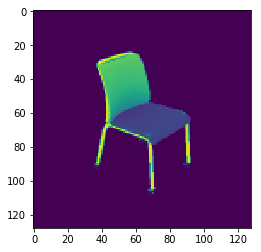

In [13]:
plt.imshow(padded_gray_images[890][0])

In [14]:
unique_images = padded_gray_images[:,1,:,:]
np.save('unique_object_images', unique_images) # only one 2D view fior each object

In [77]:
voxels_filtered = np.load('chair_voxels_filtered_0.npy')

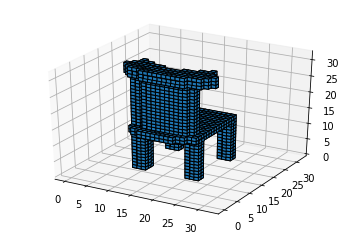

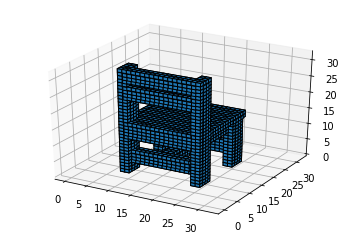

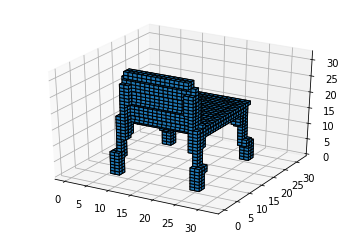

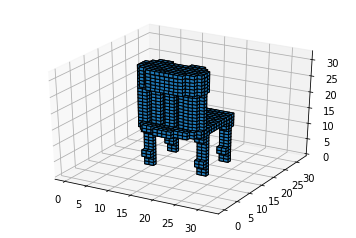

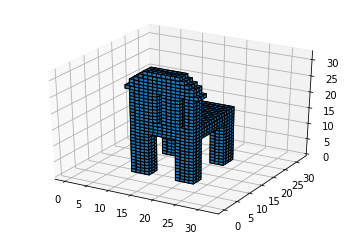

In [81]:
for i in [123, 248, 343, 122, 577]:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.voxels(voxels_filtered[i], edgecolor='k')

    plt.show()